# Assignment 5

## Import Required Library

In [1]:
import pandas as pd

## Read CSV file into Dataframe

In [2]:
df = pd.read_csv('Social_Network_ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Define x and y variables

In [5]:
#import data
x=df[['Age','EstimatedSalary']]

#output data
y=df['Purchased']

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

## train-test split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [9]:
x_train

,Age,EstimatedSalary
250,44,39000
63,32,120000
312,38,50000
159,32,135000
283,52,21000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [10]:
y_train

250    0
63     1
312    0
159    1
283    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 300, dtype: int64

<Axes: xlabel='Purchased', ylabel='count'>

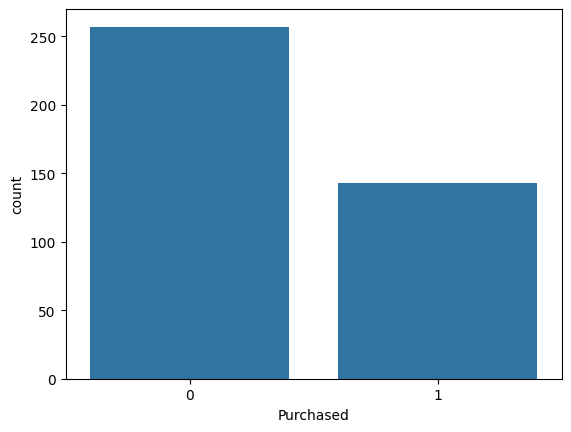

In [11]:
import seaborn as sns
sns.countplot(x=y)

In [12]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [13]:
x_train.head()

,Age,EstimatedSalary
250,44,39000
63,32,120000
312,38,50000
159,32,135000
283,52,21000


In [14]:
x_train.shape

(300, 2)

In [15]:
x_test.shape

(100, 2)

## Apply Logistic Regression Model

In [16]:
#import the class
from sklearn.linear_model import LogisticRegression

In [17]:
#create the object
classifier=LogisticRegression()

In [18]:
#Train the Algorithm
classifier.fit(x_train,y_train)

LogisticRegression()

## Make predictions



In [19]:
y_pred=classifier.predict(x_test)

In [20]:
y_pred.shape

(100,)

In [21]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [22]:
import matplotlib.pyplot as plt

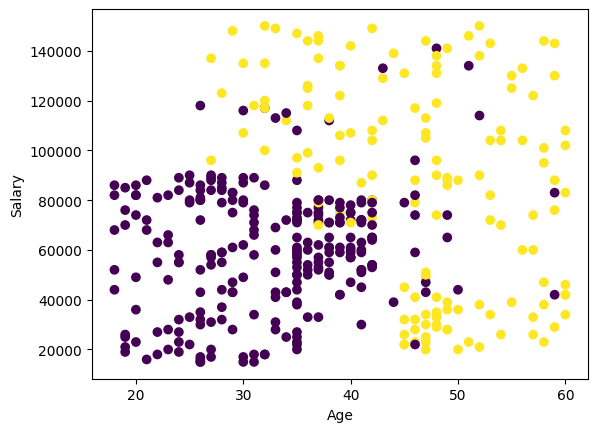

In [23]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(x['Age'],x['EstimatedSalary'],c=y)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [25]:
pd.DataFrame(x_scaled).describe()

,0,1
count,400.000000,400.000000
mean,0.467976,0.405500
std,0.249592,0.252570
min,0.000000,0.000000
25%,0.279762,0.207407
50%,0.452381,0.407407
75%,0.666667,0.540741
max,1.000000,1.000000


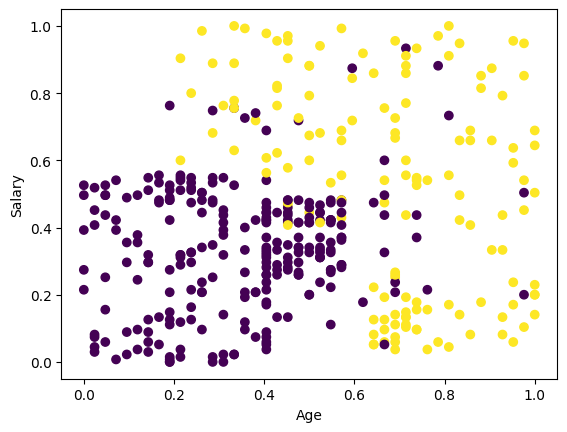

In [26]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=y)

## Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_test,y_pred)

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [29]:
y_test.value_counts()

Purchased
0    68
1    32
Name: count, dtype: int64

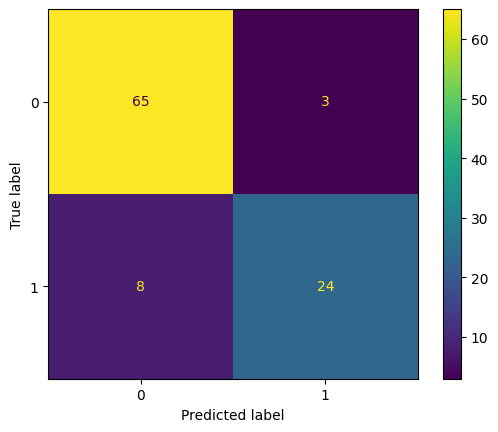

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.89

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100

